In [108]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [109]:
filename = "MSD.mat"
data = loadmat(filename)
t = data["t"][0][1:]
MSD = data["MSDrt"][1:,0:]
filename = "tau_M.mat"
data = loadmat(filename)
T = data["T"][0][1:]

In [110]:
MSD.shape

(64, 11)

In [111]:
## obtain diffusivity
"""
log(MSD) = A*log(t) + B
MSD = exp(A*log(t) + B)
    = exp(B)*t^A (A~=1)
    = 2*dim*D*t
"""

n = 9
D_list = []
for iT, T_i in enumerate(T):
    MSD_T = MSD[:,iT]
    y = np.log(MSD_T)[-n:]
    x = np.vstack([np.log(t[-n:]),np.ones(n)]).T
    A, B = np.linalg.lstsq(x, y, rcond=None)[0]
    D = np.exp(B)/6
    D_list.append(D)
    print(f"A: {A}, B: {B}, D: {D}, T: {T_i:0.1f}")

A: 0.9662769700983453, B: -12.906825339326623, D: 4.1350972312353653e-07, T: 0.5
A: 0.9870826758823827, B: -11.510960426804346, D: 1.6699449501977099e-06, T: 0.6
A: 1.0037510537864747, B: -10.863515236113157, D: 3.1906857189760728e-06, T: 0.7
A: 1.008422720296964, B: -10.370301814133056, D: 5.224971141110406e-06, T: 0.8
A: 1.0010327571795803, B: -9.851371492174515, D: 8.77915003981433e-06, T: 0.9
A: 0.9949826047258765, B: -9.426282193259544, D: 1.3429702998048854e-05, T: 1.0
A: 1.003408737942034, B: -9.110079565003801, D: 1.8424319865783988e-05, T: 1.2
A: 1.0001249528686977, B: -8.58150550894804, D: 3.1257069662241696e-05, T: 1.5
A: 1.0001521055280833, B: -8.069786168841496, D: 5.2141695171397654e-05, T: 2.0
A: 1.005833223774551, B: -7.536954709459144, D: 8.883639141477582e-05, T: 3.0
A: 0.998852142537779, B: -6.792876227684963, D: 0.00018695629277338513, T: 5.0


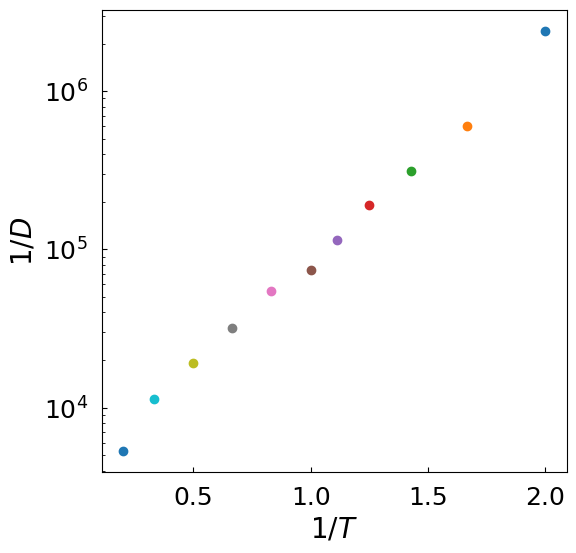

In [112]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
for iT, T_i in enumerate(T):
    ax.plot(1/T_i,1/D_list[iT],"o")
ax.set_xlabel(r"$1/T$", fontsize=20)
ax.set_ylabel(r"$1/D$", fontsize=20)
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)
# ax.set_xscale('log')
ax.set_yscale('log')

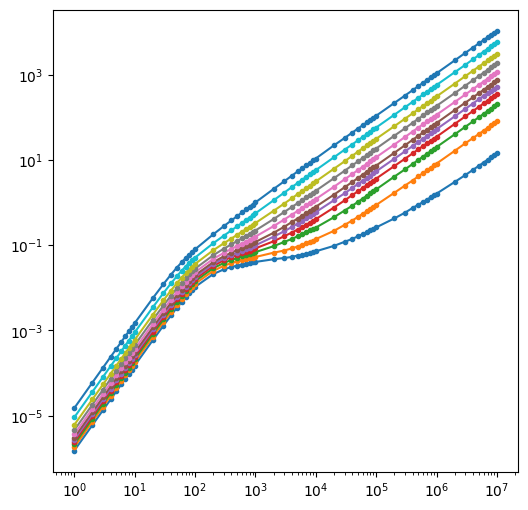

In [113]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.plot(t,MSD,".-")
ax.set_xscale('log')
ax.set_yscale('log')